In [82]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/juhimishra/Downloads/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
print("No of Rows: ",df.shape[0])
print("No of columns: ",df.shape[1])

No of Rows:  32560
No of columns:  15


In [4]:
# looking for object and float base data using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Check the name of coloumns which contain string
df.select_dtypes(include='object').columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [6]:
# Checking length
len(df.select_dtypes(include='object').columns)

9

In [7]:
# Check the name of coloumns which contain numerical value
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [8]:
# Checking Length
len(df.select_dtypes(include=['int64', 'float64']).columns)

6

In [9]:
# Analyzing throuh static data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


1. As per above static data there are no missing values present in data.
2. Quantile data for fnlwgt is showing some skewness and outliers which will chwck further using different visual         techniques
3. Education Num here is a categorical data 
4. in Capital gain and loss there are lot many 0's present 
5. Hours per week min is 1 hrs and max is 99 hrs there is a huge difference between 75% and max 

In [10]:
df.isna().sum().to_frame('Missing values')

,Missing values
Age,0
Workclass,0
Fnlwgt,0
Education,0
Education_num,0
Marital_status,0
Occupation,0
Relationship,0
Race,0
Sex,0


No missing values even in categorical data

In [11]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
df['Income'].value_counts().to_frame('Total Income')

,Total Income
<=50K,24719
>50K,7841


Here data seems to be imbalanced as there is a huge gap between >50K and <=50K

In [13]:
df['Income']=df['Income'].replace({' <=50K': 0,' >50K':1}) # replace for 0 and 1

In [14]:
np.mean(df['Income'])

0.24081695331695332

24% of people are having income greater than 50K

Let's analyze using visualization method and count method for any missing values inside the data or not

In [16]:
df['Workclass'].value_counts().to_frame('No of Employee')

,No of Employee
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


from here we got  1836 missing data .

# Categorical Column analysis

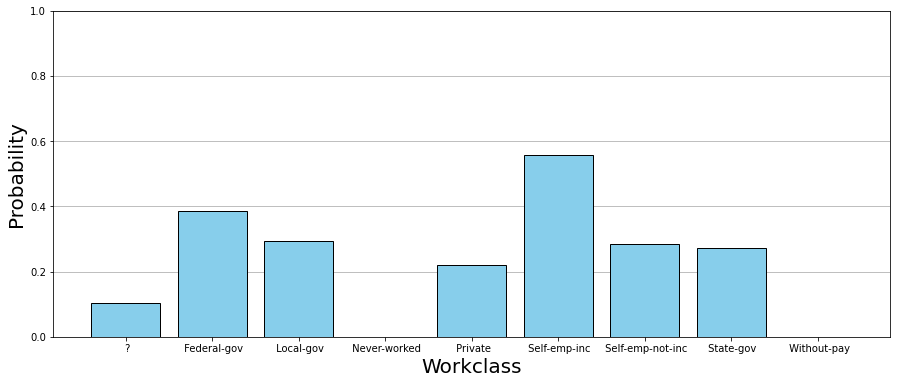

In [17]:
# probability of belonging to the group with the highest income
Workclass_income = df.groupby('Workclass')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(15,6))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.bar(Workclass_income.index.astype(str), Workclass_income,
       color = 'SkyBlue' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

We were checking here the probability of income from workclass where the employee work and as we can see from above graph
that people belongs to self-Employment are having higher probaility to earn more and lowest is the missing data which we is obviuos
as we don't have information for the same.

In [18]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

There is no null value in this categorical column

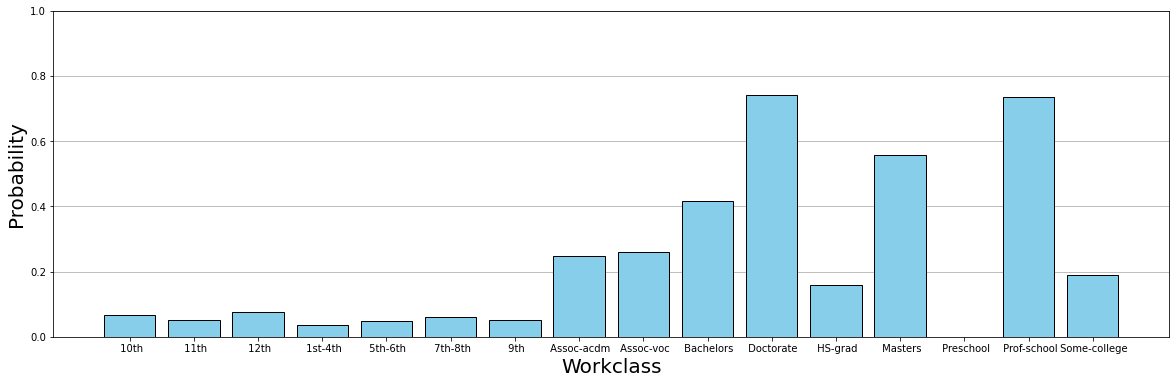

In [19]:
# probability of belonging to the group with the highest income
Education_income = df.groupby('Education')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(20,6))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.bar(Education_income.index.astype(str), Education_income,
       color = 'SkyBlue' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

Probability to have higher income is for those who having doctorate background and prof-School as expected followed by masters
and least income for those who are having education below or equal 10th.

In [20]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Here also we don't have null values

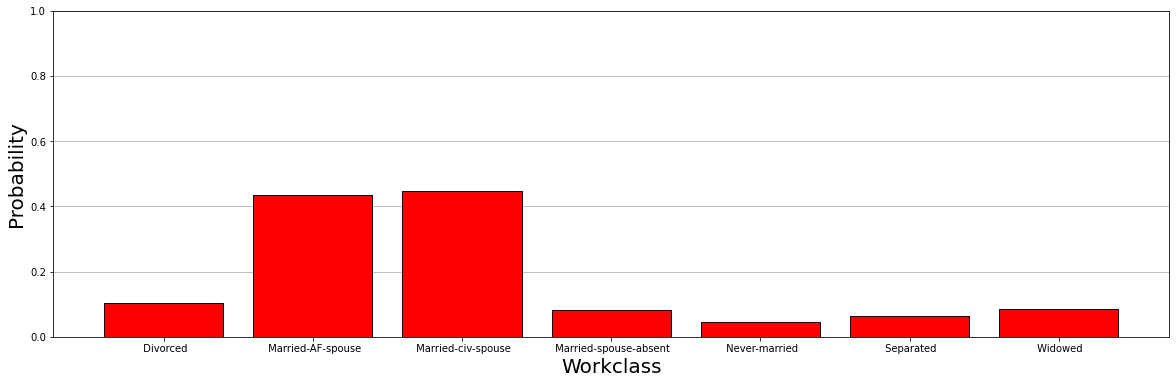

In [21]:
# probability of belonging to the group with the highest income
Married_income = df.groupby('Marital_status')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(20,6))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.bar(Married_income.index.astype(str), Married_income,
       color = 'red' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

Probability of earning high is for married people as expected 

In [22]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [23]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Here in occupation too we can see 1843 null values. Before we got null value of 1836 in workclass so there is a similarity between values almost same. There may be chances of correlation between two. Will check further

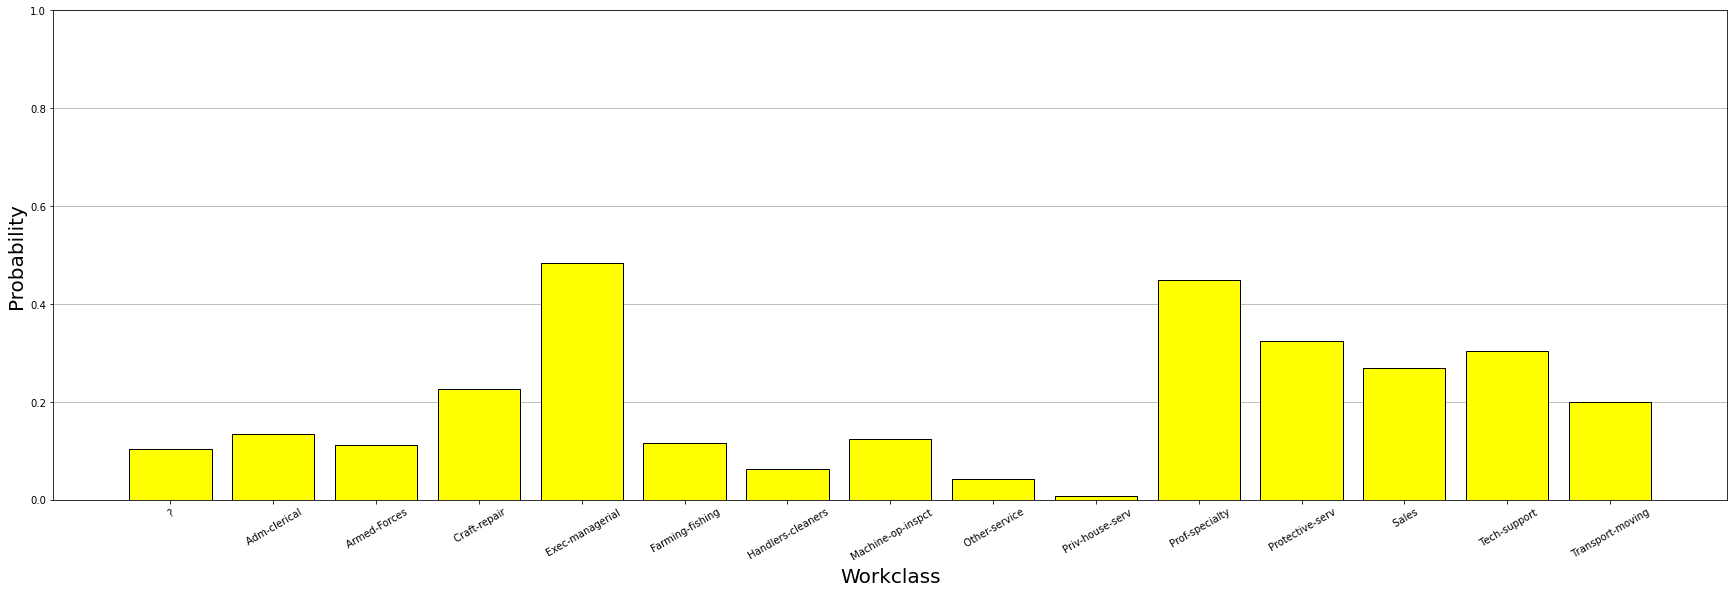

In [24]:
# probability of belonging to the group with the highest income
Occupation_income = df.groupby('Occupation')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(30,9))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.xticks(rotation=30) # rotate axis text
plt.bar(Occupation_income.index.astype(str), Occupation_income,
       color = 'yellow' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

Executive managerial and professional specialist are having having probability to earn more compare to others 

In [25]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

No null values

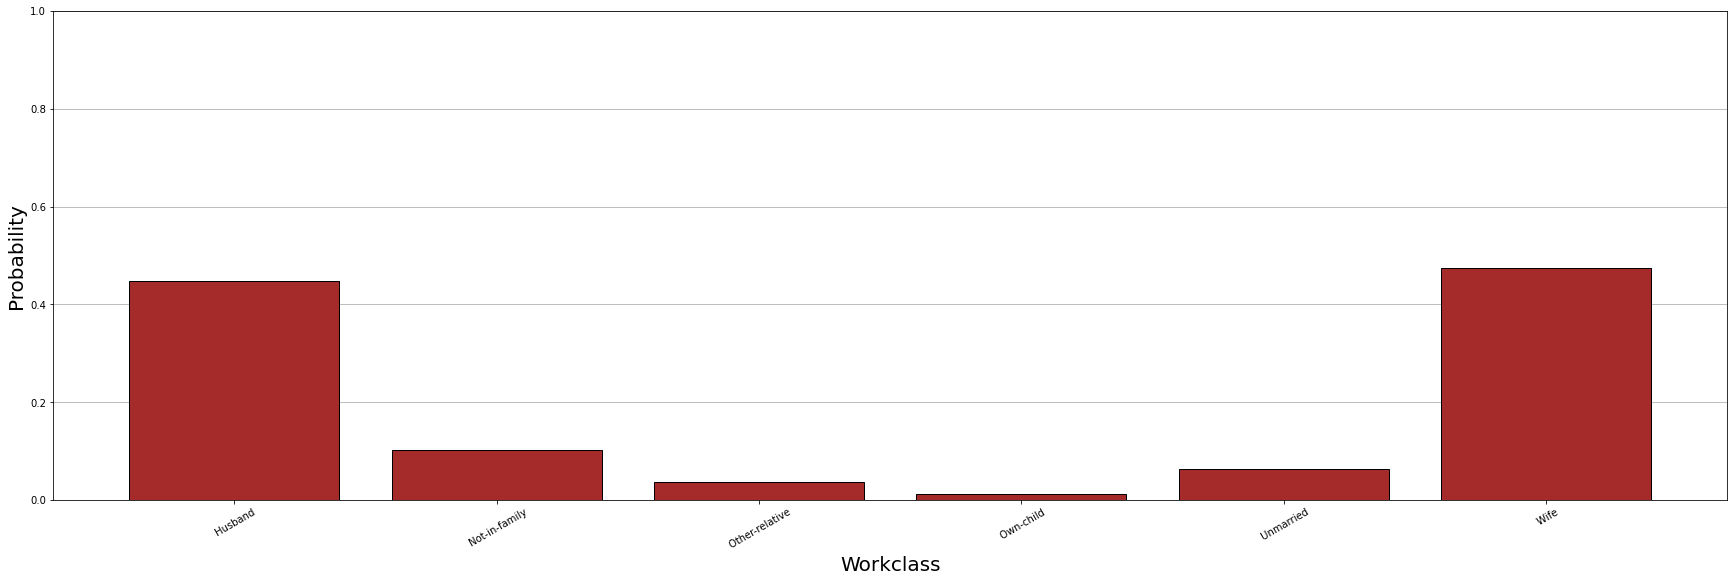

In [26]:
# probability of belonging to the group with the highest income
Relationship_income = df.groupby('Relationship')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(30,9))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.xticks(rotation=30) # rotate axis text
plt.bar(Relationship_income.index.astype(str), Relationship_income,
       color = 'brown' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

As we can see the barplot that both husband and wife probability of earning more is higher compare to others that means
married people are earning more than others.

In [27]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [28]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

No null values. And even population of white are in great number 

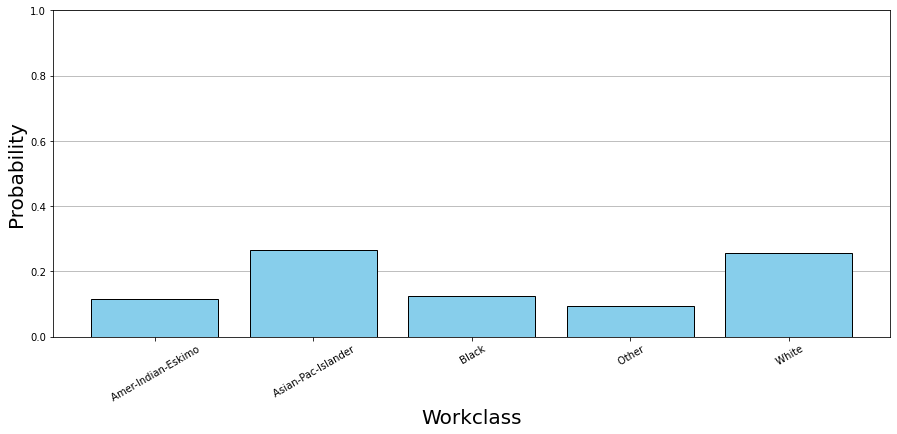

In [29]:
# probability of belonging to the group with the highest income
Race_income = df.groupby('Race')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(15,6))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.xticks(rotation=30) # rotate axis text
plt.bar(Race_income.index.astype(str), Race_income,
       color = 'Skyblue' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

Both white and Asian-pac-islander are earning more compare to others. Where we can assume that there is a discrimination for black people . Also we seen above that differnce between no of popultion between black and Asian-Pac-Islander is not muh more even observed that Black is more in number compare to Asian-Pac-islander still having less probability of earning more which clearly shows that discrimination is there for black population

In [30]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

No of male are more than female almost double 

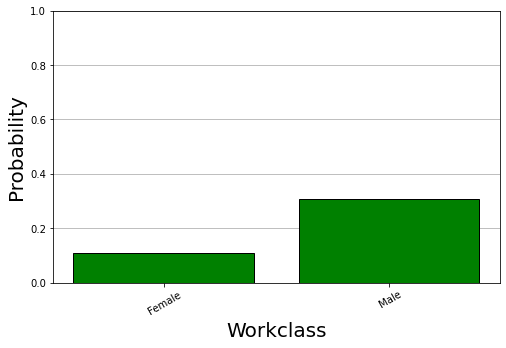

In [31]:
# probability of belonging to the group with the highest income
Sex_income = df.groupby('Sex')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(8,5))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.xticks(rotation=30) # rotate axis text
plt.bar(Sex_income.index.astype(str), Sex_income,
       color = 'green' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

As expected already concluded from count that no male are almost double of female so definately earning more probability will be for men

In [32]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

null value are present let's check through count method

In [33]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

643 missing data are available in native country 

# Continous Column Analysis

In [34]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [35]:
# Show average age by income
df.groupby("Income")["Age"].mean() 


Income
0    36.783648
1    44.249841
Name: Age, dtype: float64

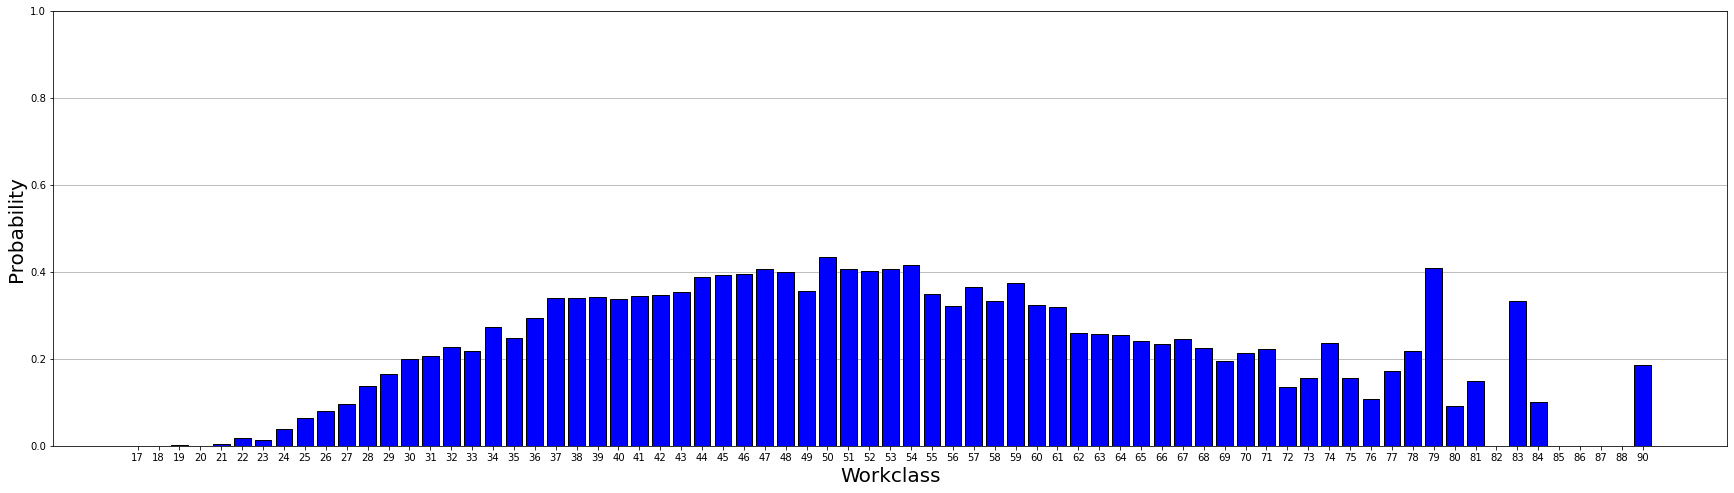

In [36]:
# probability of belonging to the group with the highest income
Age_income = df.groupby('Age')['Income'].mean() # To check correlation between two

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(30,8))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.bar(Age_income.index.astype(str), Age_income,
       color = 'blue' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

from above graph we can see that population above 37 are in in higher earning side and and this graph shows again downfall 
after the age of 59 that is the retirement age . But at the age of 79 graph shows higher income side which we can assume that
either they are in higher in position or having own business or having good holdings in company.

In [37]:
df.loc[df['Fnlwgt'] == '?'] 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


No null values 

# Ordinal Category Analysis

In [38]:
df["Education_num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [39]:
df["Education_num"].value_counts().to_frame('No of Students')

,No of Students
9,10501
10,7291
13,5354
14,1723
11,1382
7,1175
12,1067
6,933
4,646
15,576


no null values

In [40]:
df["Education"].value_counts().to_frame("Total Students")

,Total Students
HS-grad,10501
Some-college,7291
Bachelors,5354
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646
Prof-school,576


Most population has completed their studies from HS-graduation background followed by collage and bachelors that means 
most of the population have completed their studies upto graduation label.

<AxesSubplot:xlabel='Education', ylabel='Native_country'>

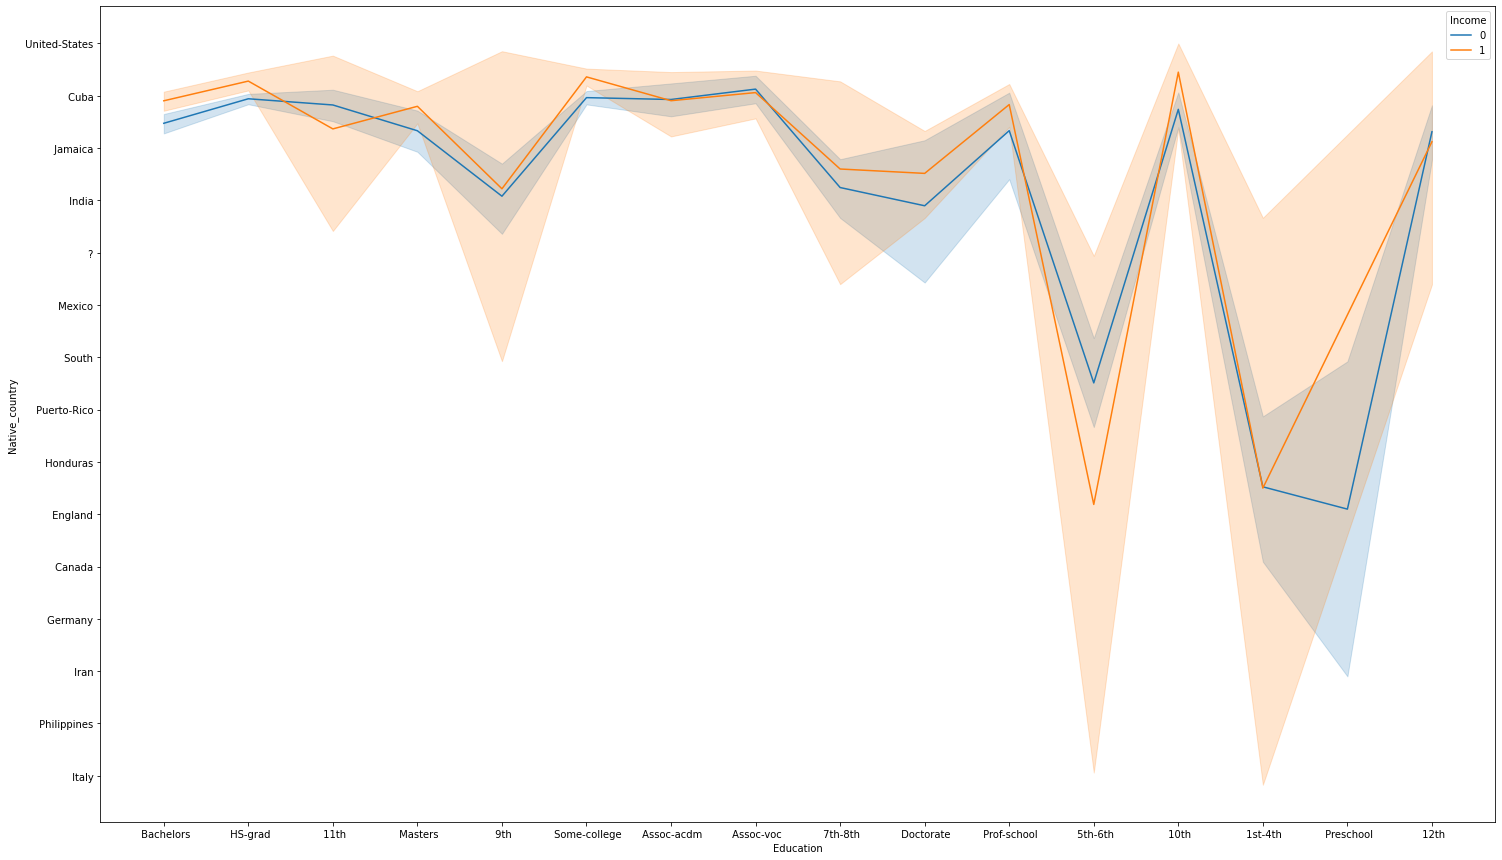

In [41]:
plt.figure(figsize=(25,15))
sns.lineplot(x='Education',y='Native_country',hue = 'Income',data=df)

with the help of line plot we can see analyze that mainly population belongs to Cuba, Jamaica and India are having higher ncome
and almost lowest is showig after England. This doesn't mean that due to discrimination or main importance being given to these states
even we can see that population from England are having even low education background which affect their carrier and income

In [42]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [43]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

No null values

In [44]:
df["Capital_loss"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

no null values

In [45]:
df["Hours_per_week"].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

Before checking skewness and outliers need to fill missing values we got an transform object data to float or int form

In [46]:
# Replacing all null values of categorical column to nan
df_new = df.replace(' ?',np.nan)
df_new.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [47]:
df_new['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [48]:
df_new['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [49]:
df_new['Workclass']=df_new['Workclass'].replace(np.NaN,df_new['Workclass'].mode()[0])
df_new['Occupation']=df_new['Occupation'].replace(np.NaN,df_new['Occupation'].mode()[0])
df_new['Native_country']=df_new['Native_country'].replace(np.NaN,df_new['Native_country'].mode()[0])


In [50]:
df_new.select_dtypes(include='object').columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

In [51]:
le = LabelEncoder()
df1 = le.fit_transform(df_new['Workclass'])
pd.Series(df1)

0        5
1        3
2        3
3        3
4        3
        ..
32555    3
32556    3
32557    3
32558    3
32559    4
Length: 32560, dtype: int64

In [52]:
df_new['Workclass'] = df1

In [53]:
df2 = le.fit_transform(df_new['Education'])
pd.Series(df2)

0         9
1        11
2         1
3         9
4        12
         ..
32555     7
32556    11
32557    11
32558    11
32559    11
Length: 32560, dtype: int64

In [54]:
df_new['Education'] = df2

In [55]:
df3 = le.fit_transform(df_new['Marital_status'])
pd.Series(df3)

0        2
1        0
2        2
3        2
4        2
        ..
32555    2
32556    2
32557    6
32558    4
32559    2
Length: 32560, dtype: int64

In [56]:
df_new['Marital_status'] = df3

In [57]:
df4 = le.fit_transform(df_new['Occupation'])
pd.Series(df4)

0         3
1         5
2         5
3         9
4         3
         ..
32555    12
32556     6
32557     0
32558     0
32559     3
Length: 32560, dtype: int64

In [58]:
df_new['Occupation']=df4

In [59]:
df5 = le.fit_transform(df_new['Relationship'])
pd.Series(df5)

0        0
1        1
2        0
3        5
4        5
        ..
32555    5
32556    0
32557    4
32558    3
32559    5
Length: 32560, dtype: int64

In [60]:
df_new['Relationship']=df5

In [61]:
df6 = le.fit_transform(df_new['Race'])
pd.Series(df6)

0        4
1        4
2        2
3        2
4        4
        ..
32555    4
32556    4
32557    4
32558    4
32559    4
Length: 32560, dtype: int64

In [62]:
df_new['Race']=df6

In [63]:
df7 = le.fit_transform(df_new['Native_country'])
pd.Series(df7)

0        38
1        38
2        38
3         4
4        38
         ..
32555    38
32556    38
32557    38
32558    38
32559    38
Length: 32560, dtype: int64

In [64]:
df_new['Native_country']=df7

In [65]:
df_new['Sex']=df_new['Sex'].replace({' Male': 0,' Female':1}) # replace for 0 and 1

In [66]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,0,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,0,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,0,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,1,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,1,0,0,40,38,0


# Chekcking Skewness

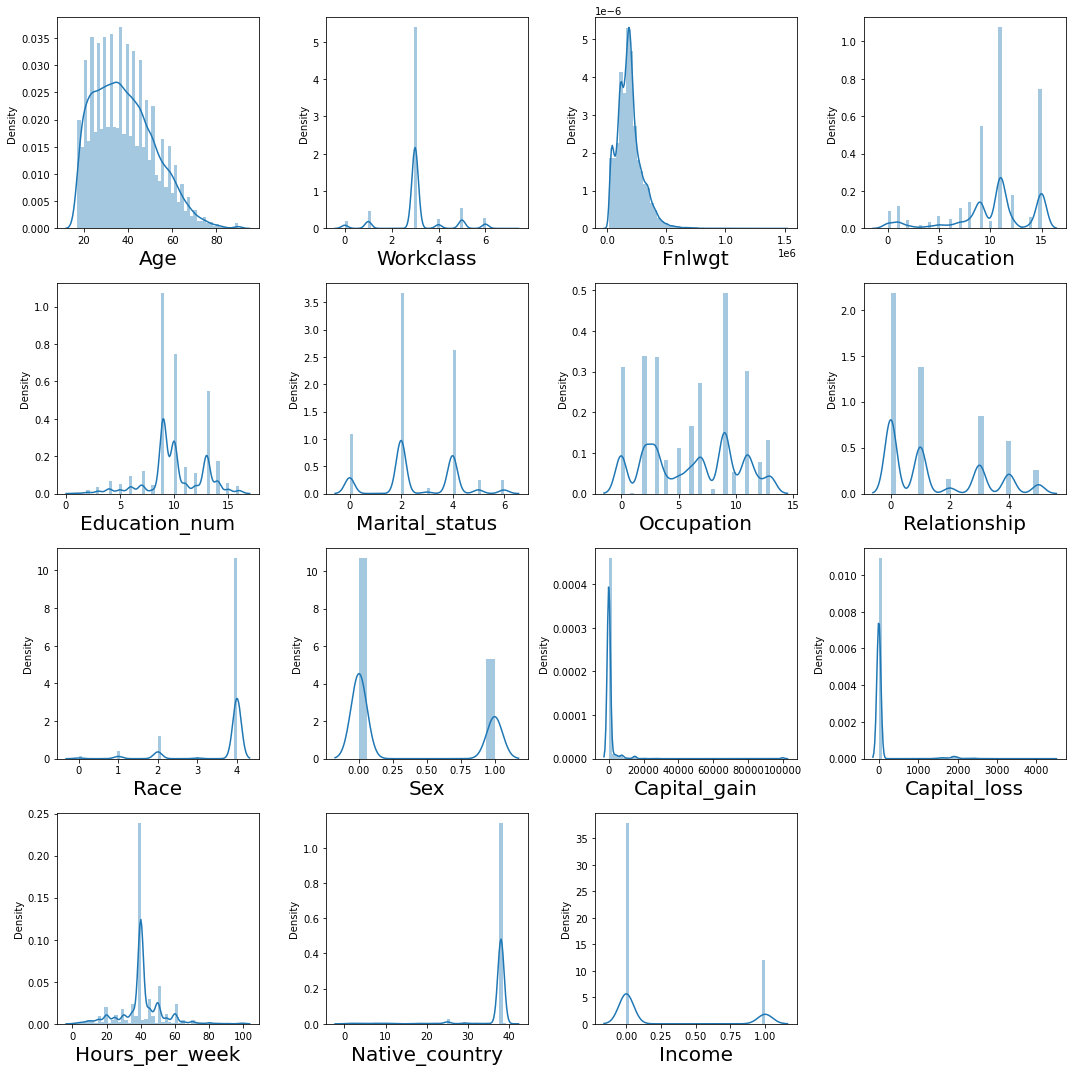

In [67]:
# Checking skewness in continous data
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df_new:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

As we can see through above graph that our three of the continous data which are not categorical are right skewed will 
use Log1p to treat the skewness. Also normal distribution is considered when our skewness lies between -+5

In [68]:
df_new.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex                0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

In [69]:
skew = ['Fnlwgt','Capital_gain','Capital_loss']

In [70]:
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [71]:
df_new.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt           -0.842559
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex               0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

# Locating Outliers

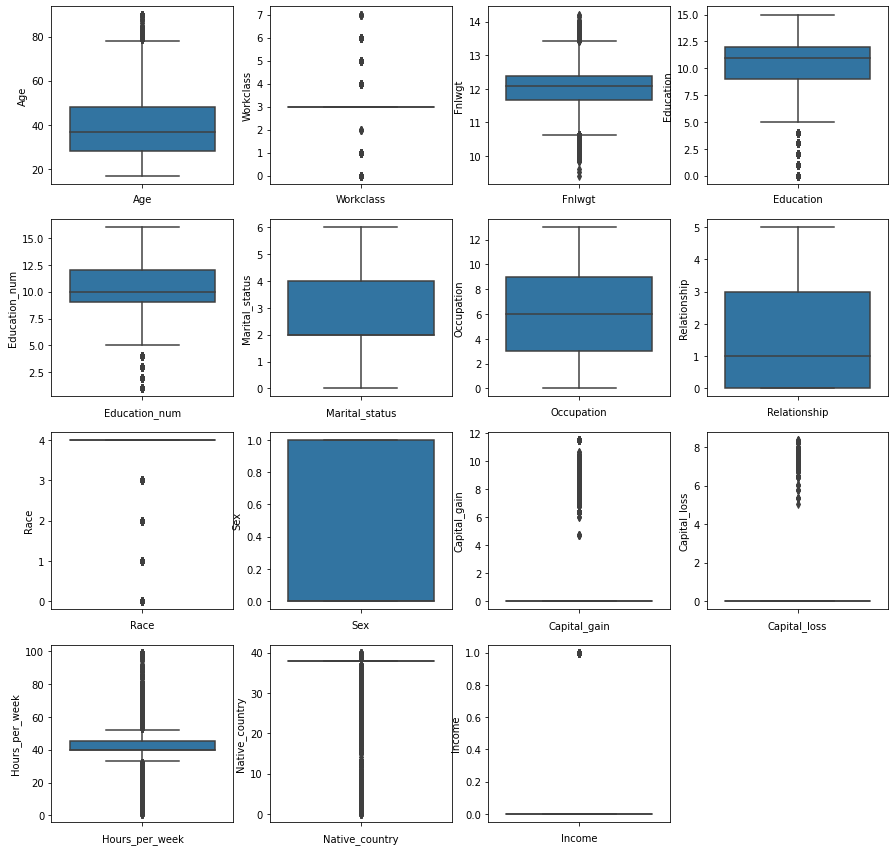

In [72]:
# Let's check outliers 
plt.figure(figsize=(15,15))

graph=1

for column in df_new.columns:
    if graph<=16:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(y=df_new[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

Outliers found in 
1. Final Weight
2. Capital_gain
3. Capital_loss

Will not do anything for outliers as data loss is almost more than 10% with any of the method either z-score or quantile.


# Correlation using heatmap if any

In [73]:
df_new.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.060188,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,-0.088832,0.124196,0.051448,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.025659,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,-0.071535,0.015113,-0.000621,0.042206,-0.001646,0.002739
Fnlwgt,-0.060188,-0.025659,1.000000,-0.028743,-0.037547,0.025856,-0.000635,0.011113,-0.009088,-0.019362,-0.000552,-0.004137,-0.024335,-0.066023,-0.001393
Education,-0.010508,0.004901,-0.028743,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,0.027349,0.024987,0.016657,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.037547,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,-0.012256,0.129055,0.077153,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.025856,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,0.129337,-0.066684,-0.035948,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,-0.000635,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,-0.047497,0.011020,0.009769,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.011113,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,0.582453,-0.083388,-0.057456,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.009088,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,-0.087197,0.024058,0.018358,0.041910,0.116526,0.071853
Sex,-0.088832,-0.071535,-0.019362,0.027349,-0.012256,0.129337,-0.047497,0.582453,-0.087197,1.000000,-0.068956,-0.042591,-0.229312,-0.002055,-0.215995


In [75]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,11.330348,9,13,2,3,0,4,0,0.0,0.0,13,38,0
1,38,3,12.281398,11,9,0,5,1,4,0,0.0,0.0,40,38,0
2,53,3,12.366157,1,7,2,5,0,2,0,0.0,0.0,40,38,0
3,28,3,12.732013,9,13,2,9,5,2,1,0.0,0.0,40,4,0
4,37,3,12.558780,12,14,2,3,5,4,1,0.0,0.0,40,38,0


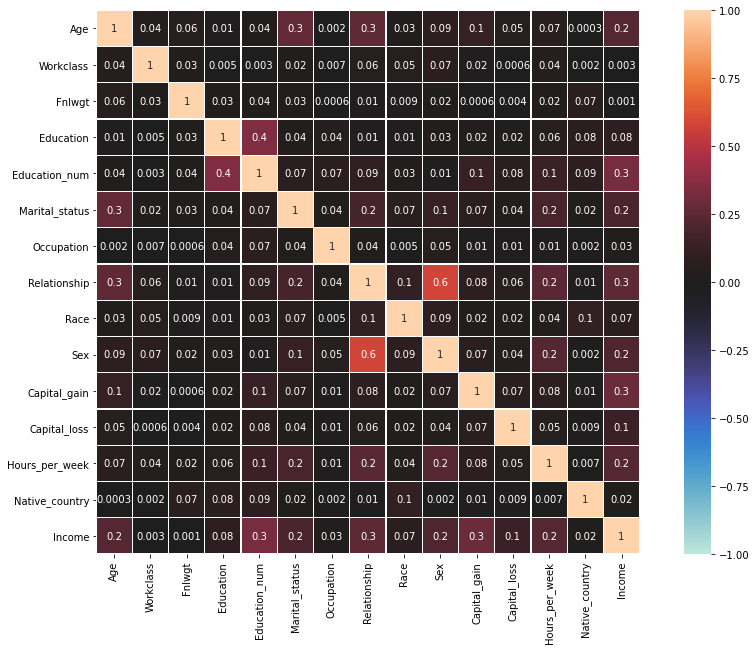

In [76]:
# Checking correlation with the help of heatmap
df_corr = df_new.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


As from above we can see that most of the feature are having low collinearity with target . Also there is a chance of multicollinearity
between education and education_num. So will use some other method to avoid multicollinearity

Dropping column fnlwgt and education no as prior one is having least correlation with target and former one is related to 
Education and as education is having more clear info so removing education no though eduation is showing least correlation 

In [79]:
df_new.drop(columns=['Fnlwgt','Education_num'],inplace=True)

In [81]:
df_new.shape

(32560, 13)

In [83]:
df_new['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

As the data is imbalance data so will do oversampling as in undersampling lots of data loss is there 

In [84]:
## Splitting target and feature variable into x and y
x = df_new.drop(columns=['Income'])
y= df_new['Income']

feature has been stored in x variable and target has been stored in y variable

In [85]:
x.shape

(32560, 12)

In [86]:
y.shape

(32560,)

In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()


In [88]:
x1,y1 = sm.fit_resample(x,y)

In [89]:
y1.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

# Preprocessing

In [91]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x1)
x_scaler

array([[ 0.74983747,  1.80187024, -0.40229818, ..., -0.26103702,
        -2.41940904,  0.25069525],
       [-0.1849104 , -0.03178615,  0.16803138, ..., -0.26103702,
        -0.17557632,  0.25069525],
       [ 0.98352444, -0.03178615, -2.68361643, ..., -0.26103702,
        -0.17557632,  0.25069525],
       ...,
       [-0.49649303, -0.03178615, -0.40229818, ..., -0.26103702,
         0.489263  ,  0.25069525],
       [-0.34070172, -1.86544254,  1.3086905 , ..., -0.26103702,
        -0.17557632,  0.25069525],
       [-0.57438869, -0.03178615, -0.40229818, ..., -0.26103702,
         0.65547283,  0.25069525]])

# Finding Best Random State

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [93]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    rsc = r2_score(y1_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.4602436386153168 On Random state:  256


In [94]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler,y1,test_size=0.30,random_state=i)

In [96]:
lr = LinearRegression()
lr.fit(x1_train,y1_train)
pred = lr.predict(x1_test)
print(r2_score(y1_test,pred))

0.28690510576556405


In [97]:
print(cross_val_score(lr,x_scaler,y1,cv=5).mean())

-0.10321210272172791


In [99]:
dt = DecisionTreeRegressor()
dt.fit(x1_train,y1_train)
pred = dt.predict(x1_test)
print(r2_score(y1_test,pred))

0.43408241796132396


In [100]:
print(cross_val_score(dt,x_scaler,y1,cv=5).mean())

0.09384424072349576


In [101]:
rf = RandomForestRegressor()
rf.fit(x1_train,y1_train)
pred = rf.predict(x1_test)
print(r2_score(y1_test,pred))

0.6334947151196801


In [102]:
print(cross_val_score(rf,x_scaler,y1,cv=5).mean())

0.3297442059039878


### Checking whether my model is overfitting model or not using lasso and ridge

In [104]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x1_train,y1_train)

LassoCV(normalize=True)

In [105]:
alpha = lassocv.alpha_
alpha

9.013906258635823e-07

In [106]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x1_train,y1_train)

Lasso(alpha=9.013906258635823e-07)

In [107]:
lasso_reg.score(x1_test,y1_test)

0.2869051052686876

In [108]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x1_train,y1_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [109]:
alpha = ridgecv.alpha_
alpha

0.1

In [110]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x1_train,y1_train)

Ridge(alpha=0.1)

In [111]:
ridge_reg.score(x1_test,y1_test)

0.2869051057563241

As there is not much difference in linearregression, lasso and ridge score so my model is not an overfitting model.

# Hyperparameter Tuning

As less difference between cv and r2 score is for RandomForestCV so will do hyperparameter tuning for the same 

In [119]:
# RandomForestRegressor
param = {'n_estimators':[100,500],
        'criterion':['mse','mae'],
        'max_depth':[2,4,6,8,10],
        'max_features':['auto','sqrt','log2']}

In [120]:
GC = GridSearchCV(rf,param,cv=5)

In [ ]:
GC.fit(x1_train,y1_train)

In [ ]:
GC.best_params_

# Save the model

In [ ]:
import joblib
joblib.dump(final_rfc,'Finalmodelcensusincome.pk1')